## 1. Preparing the data

### Import

In [1]:
import pandas as pd

In [2]:
# read in the CSV file
original_data = pd.read_csv("car-data.csv")

In [3]:
original_data.head(10)

,mpg,cyl,disp,hp,wgt,acc,country,year,make,model
0,18.0,8,307.0,130,3504,12.0,1,70,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1,70,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,1,70,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,1,70,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,1,70,ford,torino
5,15.0,8,429.0,198,4341,10.0,1,70,ford,galaxie 500
6,14.0,8,454.0,220,4354,9.0,1,70,chevrolet,impala
7,14.0,8,440.0,215,4312,8.5,1,70,plymouth,fury iii
8,14.0,8,455.0,225,4425,10.0,1,70,pontiac,catalina
9,15.0,8,390.0,190,3850,8.5,1,70,amc,ambassador dpl


In [4]:
# view specific row #11
original_data.iloc[10]

mpg                 15.0
cyl                    8
disp               383.0
hp                   170
wgt                 3563
acc                 10.0
country                1
year                  70
make               dodge
model      challenger se
Name: 10, dtype: object

## 2. Cleanup / Validation

In [5]:
# making a copy of imported data
data = original_data.copy()

In [6]:
data.head()

,mpg,cyl,disp,hp,wgt,acc,country,year,make,model
0,18.0,8,307.0,130,3504,12.0,1,70,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1,70,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,1,70,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,1,70,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,1,70,ford,torino


In [7]:
# rename the coulumns
cols = { 
    "mpg": "MPG",
    "cyl": "Cylinders",
    "disp": "Displacement",
    "hp": "Horsepower",
    "wgt": "Weight",
    "acc": "Acceleration",
    "country": "Country",
    "year": "Year",
    "make": "Make",
    "model": "Model" }
data = data.rename(columns=cols)

In [8]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Country,Year,Make,Model
0,18.0,8,307.0,130,3504,12.0,1,70,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1,70,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,1,70,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,1,70,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,1,70,ford,torino


In [9]:
# check for null values 

data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Country         0
Year            0
Make            0
Model           2
dtype: int64

In [10]:
# view the data types
data.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Country           int64
Year              int64
Make             object
Model            object
dtype: object

In [11]:
data.iloc[32]

MPG              25.0
Cylinders           4
Displacement     98.0
Horsepower          ?
Weight           2046
Acceleration     19.0
Country             1
Year               71
Make             ford
Model           pinto
Name: 32, dtype: object

In [12]:
# replace ? with blanks 
data.replace(to_replace="?", value=None, inplace=True)

In [13]:
data.iloc[32]

MPG              25.0
Cylinders           4
Displacement     98.0
Horsepower       None
Weight           2046
Acceleration     19.0
Country             1
Year               71
Make             ford
Model           pinto
Name: 32, dtype: object

In [14]:
# drop records with missing values
data = data.dropna()

In [15]:
# convert horsepower to int
data['Horsepower'] = data['Horsepower'].astype(int)

In [16]:
data.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int32
Weight            int64
Acceleration    float64
Country           int64
Year              int64
Make             object
Model            object
dtype: object

In [17]:
# format year from two digit to four digit
data['Year'] = data['Year'].add(1900)

In [18]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Country,Year,Make,Model
0,18.0,8,307.0,130,3504,12.0,1,1970,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1,1970,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,1,1970,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,1,1970,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,1,1970,ford,torino


## 3. Feature Selection & Feature Engineering

In [19]:
data.head(1)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Country,Year,Make,Model
0,18.0,8,307.0,130,3504,12.0,1,1970,chevrolet,chevelle malibu


In [20]:
# drop the make and model columns
data = data.drop('Make',axis =1 )
data = data.drop('Model',axis =1 )

In [21]:
data.head(1)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Country,Year
0,18.0,8,307.0,130,3504,12.0,1,1970


In [22]:
# change country to one hot encoding
data['Country'] = data['Country'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
data = pd.get_dummies(data, columns=['Country'], prefix='', prefix_sep='')

In [23]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Europe,Japan,USA
0,18.0,8,307.0,130,3504,12.0,1970,0,0,1
1,15.0,8,350.0,165,3693,11.5,1970,0,0,1
2,18.0,8,318.0,150,3436,11.0,1970,0,0,1
3,16.0,8,304.0,150,3433,12.0,1970,0,0,1
4,17.0,8,302.0,140,3449,10.5,1970,0,0,1


In [24]:
# pairwise correlation
data.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Europe,Japan,USA
MPG,1.000000,-0.777254,-0.804760,-0.777768,-0.831764,0.422076,0.579658,0.246606,0.449369,-0.563736
Cylinders,-0.777254,1.000000,0.950638,0.842898,0.897210,-0.504300,-0.345426,-0.355225,-0.400235,0.608541
Displacement,-0.804760,0.950638,1.000000,0.897275,0.932769,-0.543423,-0.369486,-0.374646,-0.437174,0.654213
Horsepower,-0.777768,0.842898,0.897275,1.000000,0.864284,-0.688670,-0.415064,-0.286980,-0.319117,0.488148
Weight,-0.831764,0.897210,0.932769,0.864284,1.000000,-0.415836,-0.307805,-0.296699,-0.444370,0.598945
Acceleration,0.422076,-0.504300,-0.543423,-0.688670,-0.415836,1.000000,0.288478,0.209536,0.112154,-0.256880
Year,0.579658,-0.345426,-0.369486,-0.415064,-0.307805,0.288478,1.000000,-0.036896,0.198186,-0.134272
Europe,0.246606,-0.355225,-0.374646,-0.286980,-0.296699,0.209536,-0.036896,1.000000,-0.227929,-0.597345
Japan,0.449369,-0.400235,-0.437174,-0.319117,-0.444370,0.112154,0.198186,-0.227929,1.000000,-0.644722
USA,-0.563736,0.608541,0.654213,0.488148,0.598945,-0.256880,-0.134272,-0.597345,-0.644722,1.000000


<AxesSubplot:xlabel='Weight', ylabel='MPG'>

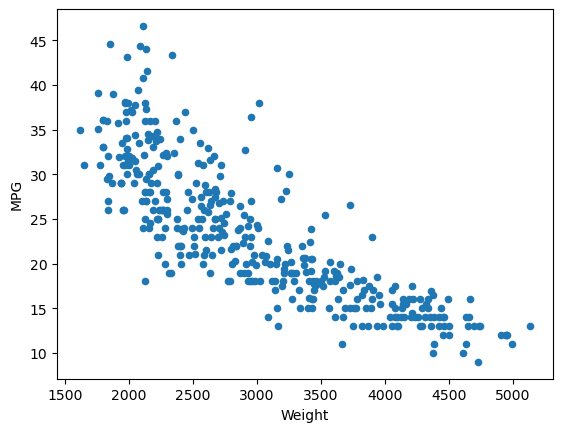

In [25]:
# Graph weight vs MPG
data.plot(kind='scatter', x='Weight', y='MPG')

<AxesSubplot:xlabel='Displacement', ylabel='MPG'>

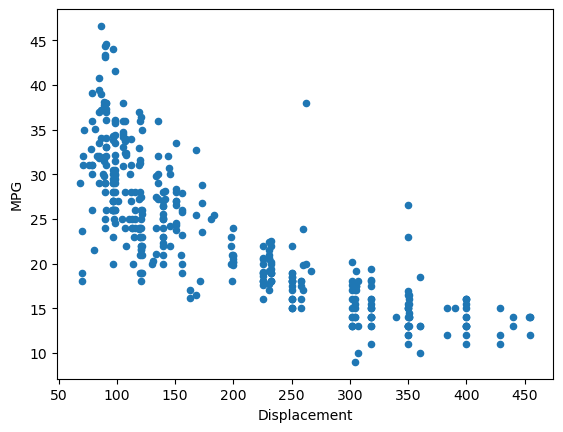

In [26]:
# Graph Displacement vs MPG
data.plot(kind='scatter', x='Displacement', y='MPG')

<AxesSubplot:xlabel='Horsepower', ylabel='MPG'>

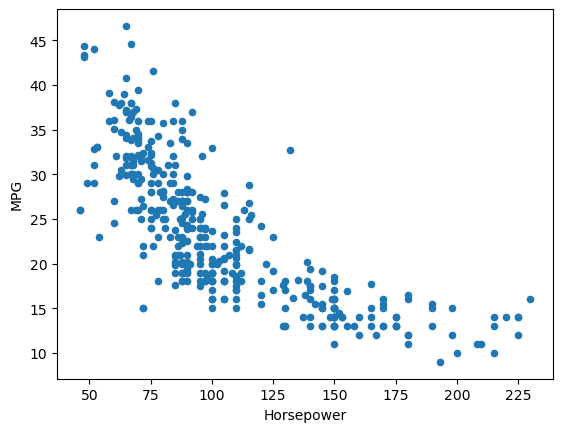

In [27]:
# Graph Horsepower vs MPG
data.plot(kind='scatter', x='Horsepower', y='MPG')

<AxesSubplot:xlabel='Cylinders', ylabel='MPG'>

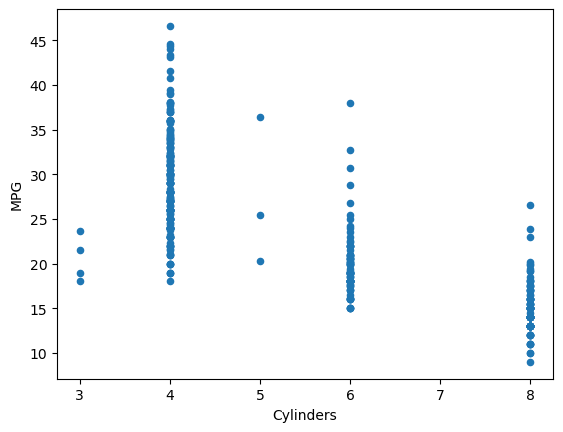

In [28]:
# Graph Cylinders vs MPG
data.plot(kind='scatter', x='Cylinders', y='MPG')

In [29]:
# Check for class imbalance
print('USA: ', data['USA'].sum())
print('Europe: ', data['Europe'].sum())
print('Japan: ', data['Japan'].sum())

USA:  245
Europe:  68
Japan:  77


In [30]:
# droping country fields because they are less significant for the model

data = data.drop('USA', axis=1)
data = data.drop('Europe', axis=1)
data = data.drop('Japan', axis=1)

In [31]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
0,18.0,8,307.0,130,3504,12.0,1970
1,15.0,8,350.0,165,3693,11.5,1970
2,18.0,8,318.0,150,3436,11.0,1970
3,16.0,8,304.0,150,3433,12.0,1970
4,17.0,8,302.0,140,3449,10.5,1970


## 4. Model Training and Evaluation

### Data split ( training vs testing)

In [32]:
# Training data
training_data = data.head(310)

# Testing data 
testing_data = data.tail(80)

In [33]:
training_data.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
308,33.5,4,151.0,90,2556,13.2,1979
309,41.5,4,98.0,76,2144,14.7,1980
310,38.1,4,89.0,60,1968,18.8,1980
311,32.1,4,98.0,70,2120,15.5,1980
312,37.2,4,86.0,65,2019,16.4,1980


In [34]:
testing_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
313,28.0,4,151.0,90,2678,16.5,1980
314,26.4,4,140.0,88,2870,18.1,1980
315,24.3,4,151.0,90,3003,20.1,1980
316,19.1,6,225.0,90,3381,18.7,1980
317,34.3,4,97.0,78,2188,15.8,1980


### Model 1 ( Linerar Regression with a single variable)

In [35]:
# y = mx + b
# x = horsepower (input variable, feature)
# y = MPG ( represents result )
# b = represents bias (constant added to 'mx' function to provide an offset



In [36]:
# Import some libraries
import matplotlib.pyplot as plt
import numpy as np

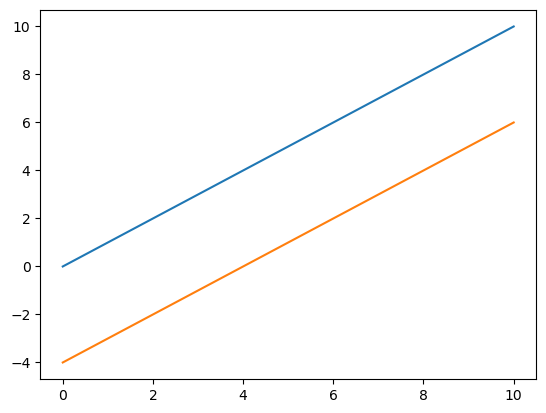

In [37]:
# demonstrate bias
x = np.linspace(0,10)
plt.plot(x, x + 0)
plt.plot(x, x - 4)

In [38]:
# import libraries
import tensorflow as tf

In [39]:
# define our first model
# keras are built up of nodes, more nodes is more complex
model1 = tf.keras.Sequential()

In [40]:
# Define layers 

# define layers 1
layer1 = tf.keras.layers.Dense(1, input_shape = (1,))
# add layers to the model
model1.add(layer1)

In [41]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [42]:
tf.keras.utils.plot_model(model1,show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [43]:
# compile model1

model1.compile(
optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss = 'mean_absolute_error'
)


In [44]:
# train model
history1 = model1.fit(
    training_data['Horsepower'], # feature
    training_data['MPG'],        # Label (Target value)
    epochs = 100,                # rounds of training
    validation_split=0.2)        # use 20% of the training data for validation
    


Epoch 1/100
8/8 [==============================] - 1s 28ms/step - loss: 58.3830 - val_loss: 11.8018
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 19.3708 - val_loss: 15.6864
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 14.5887 - val_loss: 19.4313
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 12.9404 - val_loss: 9.5668
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 11.2362 - val_loss: 10.5572
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 10.8574 - val_loss: 11.2459
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 10.4377 - val_loss: 9.6076
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 10.1691 - val_loss: 12.5027
Epoch 9/100
8/8 [==============================] - 0s 8ms/step - loss: 10.1097 - val_loss: 10.5402
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 9.9043 - val_loss: 10.3488
Epoch 11/1

In [45]:
# plot horsepower vs MPG

def plotHPvsMPG(data_hp, data_mph, pred_hp, pred_mpg):
    # plot real data
    plt.scatter(data_hp, data_mph, label='Data')
    
    # plot prediction
    plt.plot(pred_hp,pred_mpg, color='k', label ='Predictions')
             
    # show legend
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()

In [46]:
# real data
hp1 = training_data['Horsepower']
mpg1 = training_data['MPG']

# predicted data
hp2 = tf.linspace(0, 250, 251)
mpg2 = model1.predict(hp2)


8/8 [==============================] - 0s 1ms/step


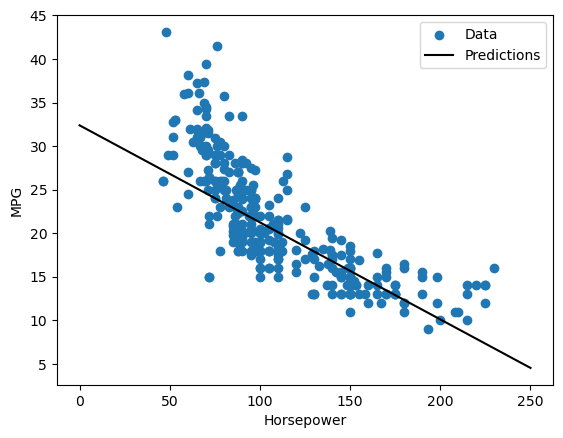

In [47]:
plotHPvsMPG(hp1, mpg1, hp2, mpg2)

In [48]:
# Get final results for model1
testing = model1.evaluate(testing_data['Horsepower'], testing_data['MPG'], verbose=0)
training = pd.DataFrame(history1.history).iloc[99]['loss']

results = {}
results['Baseline'] = training, testing

In [49]:
pd.DataFrame(results, index=['training loss', 'testing loss']).T

,training loss,testing loss
Baseline,3.421946,8.605809


## 4. Data Normalization

In [50]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
0,18.0,8,307.0,130,3504,12.0,1970
1,15.0,8,350.0,165,3693,11.5,1970
2,18.0,8,318.0,150,3436,11.0,1970
3,16.0,8,304.0,150,3433,12.0,1970
4,17.0,8,302.0,140,3449,10.5,1970


### Model 2 (with normalized data)

In [51]:
# define model 2

model2 = tf.keras.Sequential()

# define layer 1 (also normalization layer)
layer1 = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
layer1.adapt(np.array(training_data['Horsepower']))

# define layer 2
layer2 = tf.keras.layers.Dense(1)

# add layers
model2.add(layer1)
model2.add(layer2)



In [52]:
tf.keras.utils.plot_model(model2, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [53]:
# compile new model

model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [54]:
# training model 2

history2 = model2.fit(
    training_data['Horsepower'],
    training_data['MPG'],
    epochs = 100,
    verbose = 0,
    validation_split= 0.2)

8/8 [==============================] - 0s 2ms/step


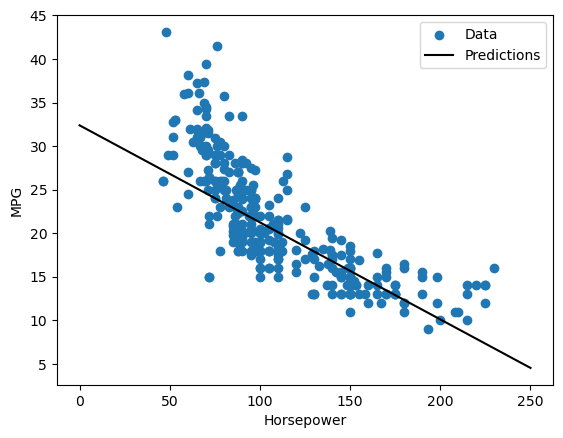

In [55]:
# real data
hp1 = training_data['Horsepower']
mpg1 = training_data['MPG']

# predicted data
hp2 = tf.linspace(0, 250, 251)
mpg2 = model1.predict(hp2)

plotHPvsMPG(hp1, mpg1, hp2, mpg2)

In [56]:
# see the results

testing = model2.evaluate(testing_data['Horsepower'], testing_data['MPG'], verbose=0)
training = pd.DataFrame(history2.history).iloc[99]['loss']
results['Normalization'] = training, testing

In [57]:
pd.DataFrame(results, index=['training loss', 'testing loss']).T

,training loss,testing loss
Baseline,3.421946,8.605809
Normalization,3.002728,7.857375


### Model 3 (with proper sampling)

In [58]:
# re-defining training and testing data

training_data = data.sample(frac=.8, random_state=0)
testing_data = data.drop(training_data.index)

In [59]:
training_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
55,27.0,4,97.0,60,1834,19.0,1971
125,20.0,6,198.0,95,3102,16.5,1974
356,32.4,4,108.0,75,2350,16.8,1981
178,23.0,4,120.0,88,2957,17.0,1975
287,16.5,8,351.0,138,3955,13.2,1979


In [60]:
testing_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
9,15.0,8,390.0,190,3850,8.5,1970
25,10.0,8,360.0,215,4615,14.0,1970
28,9.0,8,304.0,193,4732,18.5,1970
31,25.0,4,113.0,95,2228,14.0,1971
33,19.0,6,232.0,100,2634,13.0,1971


In [61]:
# Define model 3
model3 = tf.keras.Sequential()

# define layer 3
layer1 = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
layer1.adapt(np.array(training_data['Horsepower']))

# define layer 3
layer2 = tf.keras.layers.Dense(1)

# add layers
model3.add(layer1)
model3.add(layer2)


In [62]:
# compile model3

model3.compile(
optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss = 'mean_absolute_error'
)


In [63]:

# Train model 3
history3 = model3.fit(
    training_data['Horsepower'],
    training_data['MPG'],
    epochs = 100,
    verbose = 0,
    validation_split = 0.2)

8/8 [==============================] - 0s 2ms/step


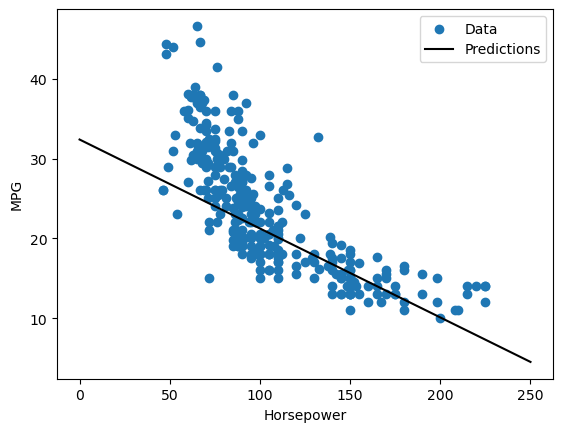

In [64]:
# plot the results

# real data
hp1 = training_data['Horsepower']
mpg1 = training_data['MPG']

# predicted data
hp2 = tf.linspace(0, 250, 251)
mpg2 = model1.predict(hp2)

plotHPvsMPG(hp1, mpg1, hp2, mpg2)

In [65]:
# see the results

testing = model3.evaluate(testing_data['Horsepower'], testing_data['MPG'], verbose=0)
training = pd.DataFrame(history3.history).iloc[99]['loss']
results['Sampling'] = training, testing

In [66]:
pd.DataFrame(results, index=['training loss', 'testing loss']).T

,training loss,testing loss
Baseline,3.421946,8.605809
Normalization,3.002728,7.857375
Sampling,3.768604,4.042127


### Model 4 (using deep learning)

In [67]:
# define model 4

model4 = tf.keras.Sequential()

# define layer 1
layer1 = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
layer1.adapt(np.array(training_data['Horsepower']))

# define layer 2
layer2 = tf.keras.layers.Dense(64, activation='relu')

# define layer 3
layer3 = tf.keras.layers.Dense(64, activation='relu')

# define layer 4
layer4 = tf.keras.layers.Dense(1)

# add layers
model4.add(layer1)
model4.add(layer2)
model4.add(layer3)
model4.add(layer4)

In [68]:
# compile model 4

model4.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss = 'mean_absolute_error')

In [69]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                128       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [70]:
# Train model 4
history4 = model4.fit(
    training_data['Horsepower'],
    training_data['MPG'],
    epochs = 100,
    verbose = 0,
    validation_split = 0.2)

8/8 [==============================] - 0s 3ms/step


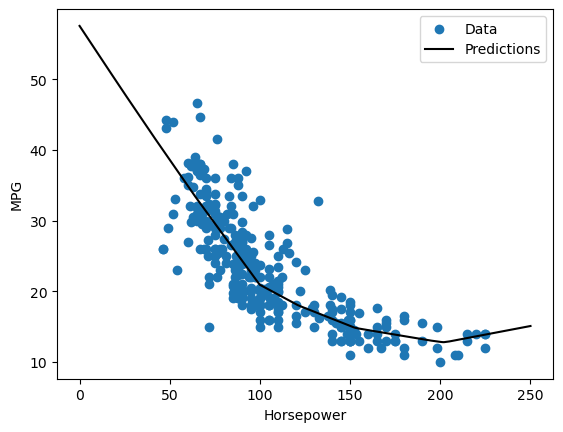

In [71]:
# plot the results

# real data
hp1 = training_data['Horsepower']
mpg1 = training_data['MPG']

# predicted data
hp2 = tf.linspace(0, 250, 251)
mpg2 = model4.predict(hp2)

plotHPvsMPG(hp1, mpg1, hp2, mpg2)

In [72]:
# Get the final results
testing = model4.evaluate(testing_data['Horsepower'], testing_data['MPG'], verbose=0)
training = pd.DataFrame(history4.history).iloc[99]['loss']
results['DeepLearning'] = training, testing

In [73]:
pd.DataFrame(results, index=['training loss', 'testing loss']).T


,training loss,testing loss
Baseline,3.421946,8.605809
Normalization,3.002728,7.857375
Sampling,3.768604,4.042127
DeepLearning,3.121968,3.476500
